<a href="https://colab.research.google.com/github/vamshi-dhanavath/SOC-Time-Series-Analysis/blob/main/tsa_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df=pd.read_csv('HDFCBANK.NS.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
1996-01-01,1996-01-01,3.030000,3.030000,2.925000,2.980000,2.417746,350000.0
1996-01-02,1996-01-02,2.980000,3.025000,2.950000,2.975000,2.413689,412000.0
1996-01-03,1996-01-03,2.975000,2.995000,2.950000,2.985000,2.421803,284000.0
1996-01-04,1996-01-04,2.985000,2.980000,2.940000,2.965000,2.405575,282000.0
1996-01-05,1996-01-05,2.965000,2.980000,2.950000,2.960000,2.401519,189000.0
...,...,...,...,...,...,...,...
2022-01-17,2022-01-17,1530.000000,1556.000000,1519.150024,1521.500000,1521.500000,11494686.0
2022-01-18,2022-01-18,1533.000000,1550.900024,1523.000000,1529.250000,1529.250000,6170576.0
2022-01-19,2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951,1518.449951,7158813.0
2022-01-20,2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000,1509.000000,7598923.0


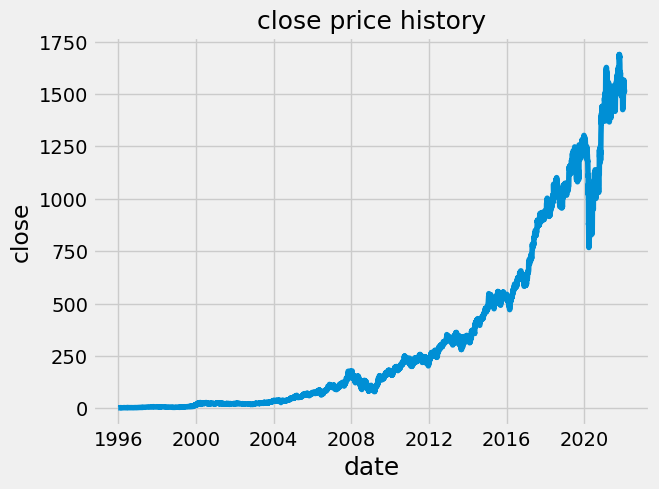

In [ ]:
# plt.figure(figsize=(16,18))
plt.title('close price history',fontsize=18)
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('close')
plt.show()

In [ ]:
#create a function to calculate the simple moving average (sma)
def SMA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()


In [ ]:
#create two columns to store 20 and 50 day sma
df['SMA20']=SMA(df,20)
df['SMA50']=SMA(df,50)

In [ ]:
#get the buy and sell signals
df['Signal']=np.where(df['SMA20']>df['SMA20'],1,0)
df['Position']=df['Signal'].diff()

df['Buy'] = np.where( df['Position'] == 1 , df['Close'] , np.NAN )
df['Sell'] = np.where( df['Position'] == -1 , df['Close'] , np.NAN )


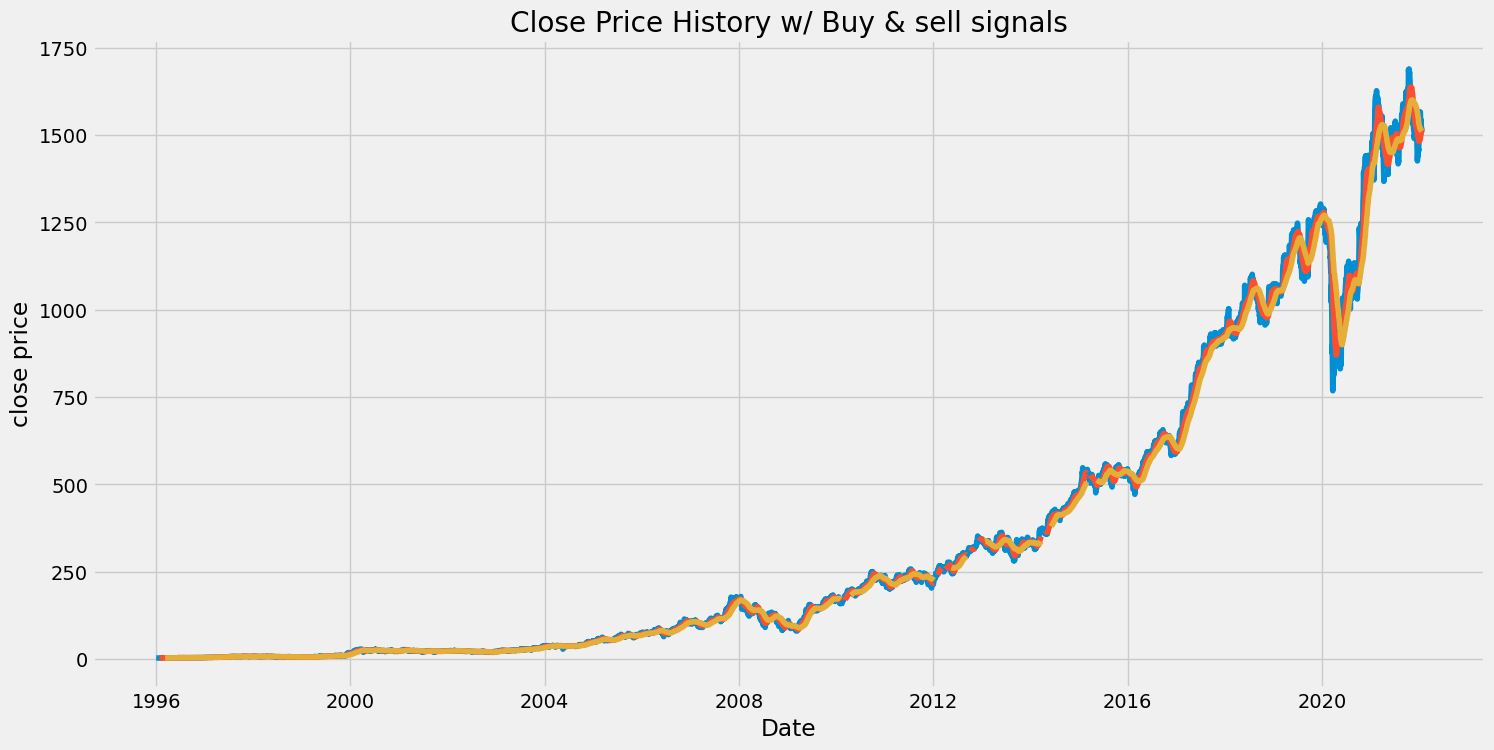

In [ ]:
#visually
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy & sell signals')
plt.plot(df['Close'],alpha=1,label='close')
plt.plot(df['SMA20'],alpha=1,label='SMA20')
plt.plot(df['SMA50'],alpha=1,label='SMA50')
plt.scatter(df.index,df['Buy'],alpha=1,label='buy signal',marker='^',color='green')
plt.scatter(df.index,df['Sell'],alpha=1,label='sell signal',marker='v',color='red')
plt.xlabel('Date')
plt.ylabel('close price')
plt.show()


In [ ]:
#decompostition
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox

In [ ]:
# Read in the data
data = pd.read_csv('AirPassengers.csv', index_col=0)
data.index = pd.to_datetime(data.index)

# Plot the data
fig = px.line(data, x=data.index, y='#Passengers',labels=({'#Passengers': 'Passengers', 'Month': 'Date'}))

fig.update_layout(template="simple_white", font=dict(size=18),title_text='Airline Passengers', width=650, title_x=0.5, height=400)

fig.show()

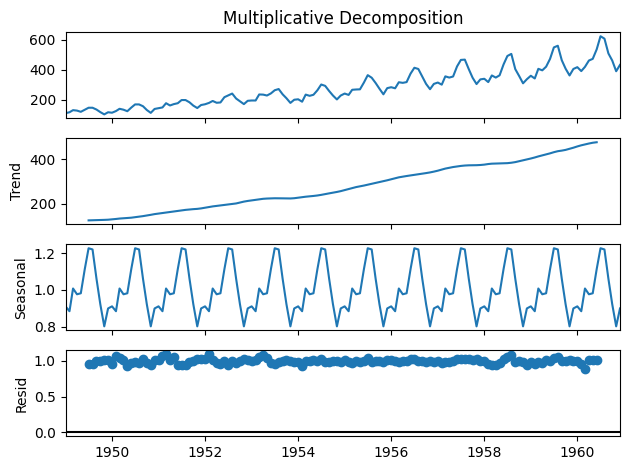

In [ ]:
# Plot the decomposition for multiplicative series
data.rename(columns={'#Passengers': 'Multiplicative Decomposition'}, inplace=True)
decomposition_plot_multi = seasonal_decompose(data['Multiplicative Decomposition'],model='multiplicative')
decomposition_plot_multi.plot()
plt.show()

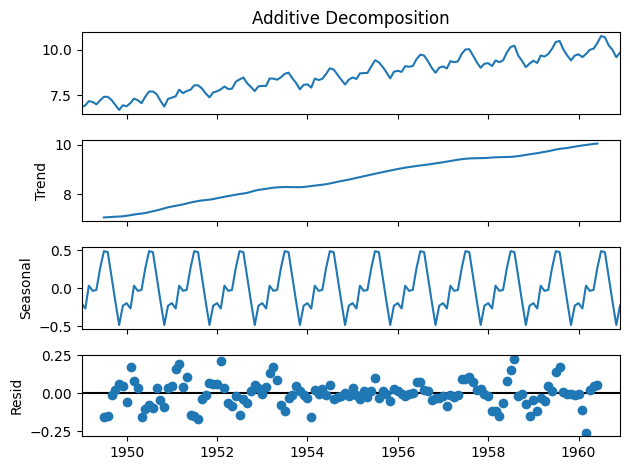

In [ ]:
# Apply boxcox to acquire additive model
data['Additive Decomposition'], lam = boxcox(data['Multiplicative Decomposition'])

# Plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(data['Additive Decomposition'],
                                            model='additive')
decomposition_plot_add.plot()
plt.show()

In [ ]:
#smooth exponential
# Import packages
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Read in the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]


def plot_func(forecast: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month'], y=test['#Passengers'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')

    return fig.show()


# Fit model and get forecasts
model = SimpleExpSmoothing(train['#Passengers']).fit(optimized=True)
forecasts = model.forecast(len(test))

# Plot the forecasts
plot_func(forecasts, 'Simple Exponential Smoothing')


In [ ]:
model.summary()

Dep. Variable:,#Passengers,No. Observations:,116
Model:,SimpleExpSmoothing,SSE,83037.230
Optimized:,True,AIC,766.521
Trend:,None,BIC,772.028
Seasonal:,None,AICC,766.881
Seasonal Periods:,None,Date:,"Wed, 10 Jul 2024"
Box-Cox:,False,Time:,19:13:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,112.00000,l.0,False


In [ ]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

# Read in the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]


def plot_func(forecast: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month'], y=test['#Passengers'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')

    return fig.show()


# Fit Simple Exponential Smoothing model and get forecasts
model = SimpleExpSmoothing(train['#Passengers']).fit(optimized=True)
forecasts = model.forecast(len(test))

# Plot the Simple Exponential Smoothing forecasts
plot_func(forecasts, 'Simple Exponential Smoothing')

# Fit Holt's model and get forecasts
# Assuming you want to use Holt's Linear Trend method
model_holt = Holt(train['#Passengers']).fit(optimized=True)  # Create the 'model_holt' variable
forecasts_holt = model_holt.forecast(len(test))

# You can now call summary on the Holt's model
model_holt.summary()

Dep. Variable:,#Passengers,No. Observations:,116
Model:,Holt,SSE,82489.369
Optimized:,True,AIC,769.753
Trend:,Additive,BIC,780.767
Seasonal:,None,AICC,770.523
Seasonal Periods:,None,Date:,"Wed, 10 Jul 2024"
Box-Cox:,False,Time:,20:08:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9949935,alpha,True
smoothing_trend,0.0006290,beta,True


In [ ]:
#fourier
import plotly.graph_objs as go
import math
import numpy as np

x = np.linspace(0, 3 * np.pi, 500)

y1 = np.sin(2 * x)
y2 = np.cos(3 * x)
y_sum = y1 + y2

trace1 = go.Scatter(x=x, y=y1, mode='lines',name='sine(2x)', line=dict(color='blue'))
trace2 = go.Scatter(x=x, y=y2, mode='lines', name='cos(3x)', line=dict(color='green'))
trace3 = go.Scatter(x=x, y=y_sum, mode='lines', name='sum', line=dict(color='red'))

layout = go.Layout(
    title='Example Sum of Sinusoidal Waves',
    xaxis=dict(title='X'),
    yaxis=dict(title='Y')
)

data = [trace1, trace2, trace3]

fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
import plotly.graph_objs as go
import numpy as np

x = np.linspace(0, 3 * np.pi, 1000)
y = np.array([np.sin((2*k + 1) * x) / (2*k + 1) for k in range(100)]).sum(axis=0) * (4 / np.pi)

trace = go.Scatter(x=x, y=y, mode='lines', name='Square Wave', line=dict(color='blue'))

layout = go.Layout(
    title='Square Wave',
    xaxis=dict(title='X'),
    yaxis=dict(title='Y', range=[-1.5, 1.5])
)

data = [trace]

fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.7 MB/s eta 0:00:00


In [ ]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import pmdarima as pm # Now this import should work
import numpy as np

# Read in the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data['month_num'] = data['Month'].dt.month

# Stabilise the variance
data['Passengers_Boxcox'], lam = boxcox(data['#Passengers'])
data.dropna(inplace=True)

# Get fourier features
for order in range(1, 10):
    data[f'fourier_sin_order_{order}'] = np.sin(2 * np.pi * order * data['month_num'] / 12)
    data[f'fourier_cos_order_{order}'] = np.cos(2 * np.pi * order * data['month_num'] / 12)

# name of fourier features
fourier_features = [i for i in list(data) if i.startswith('fourier')]

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

# Build auto-ARIMA model with fourier features
model = pm.auto_arima(train['Passengers_Boxcox'],
                      X=train[fourier_features],
                      seasonal=False,
                      stepwise=True,
                      suppress_warnings=True,
                      max_order=None,
                      information_criterion='aicc',
                      error_action="ignore")

# Get the forecasts and apply inverse box-cox transform
boxcox_forecasts = model.predict(n_periods=len(test), X=test[fourier_features])
forecasts = inv_boxcox(boxcox_forecasts, lam)


def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month'], y=test['#Passengers'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')

    return fig.show()


# Plot the forecasts
plot_forecasts(forecasts, 'Harmonic Regression')